In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy


%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


<ipython-input-104-ac4cefab052f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


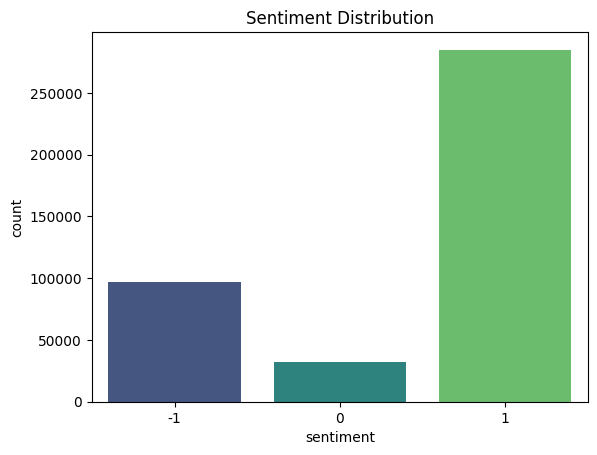

In [104]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# connection to google Drive
drive.mount('/content/drive')

# path to google Drive
file_path = '/content/drive/My Drive/Amazon_Unlocked_Mobile.csv'  # שנה בהתאם למיקום הקובץ

# load the data
df_start = pd.read_csv(file_path)

# Display the first five lines for initial testing
df_start.head()

# Checking which columns exist
df_start.info()

# Checking whether there are missing values
df_start.isnull().sum()

# Keeping only the relevant columns
df_start = df_start[['Reviews', 'Rating']].dropna()

# Convert ratings to emotion categories
def classify_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Creating an emotion column
df_start['sentiment'] = df_start['Rating'].apply(classify_sentiment)

# Showing the distribution of emotions
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [105]:
# Selecting a subset of 6,000 reviews at random
#df_sample = df.sample(n=6000, random_state=42)

# Balanced sampling
# The desired number of samples from each category
n_per_class = 2000

# A balanced sample from each category
df = df_start.groupby('sentiment').apply(lambda x: x.sample(n=n_per_class, random_state=42)).reset_index(drop=True)

# Saving the filtered file
filtered_file = "/content/drive/My Drive/filtered_amazon_reviews.csv"
df.to_csv(filtered_file, index=False)
print(f"נשמר קובץ מסונן: {filtered_file}")

<ipython-input-105-1d4ec19b39e0>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df_start.groupby('sentiment').apply(lambda x: x.sample(n=n_per_class, random_state=42)).reset_index(drop=True)


נשמר קובץ מסונן: /content/drive/My Drive/filtered_amazon_reviews.csv


In [106]:
df = pd.read_csv('/content/drive/My Drive/filtered_amazon_reviews.csv')

<ipython-input-107-70b56e181fb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


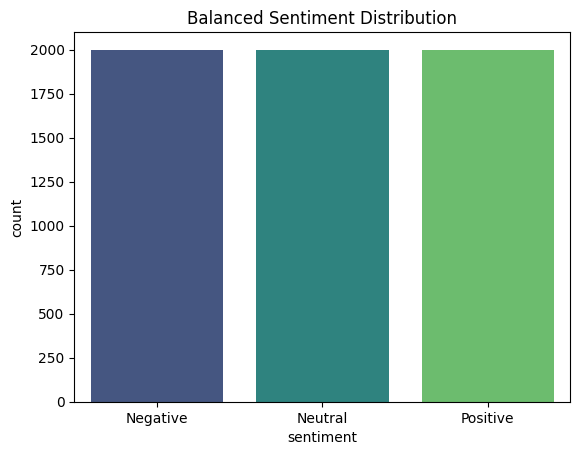

In [107]:
# Presentation of distribution after the balanced sample
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title('Balanced Sentiment Distribution')
plt.show()

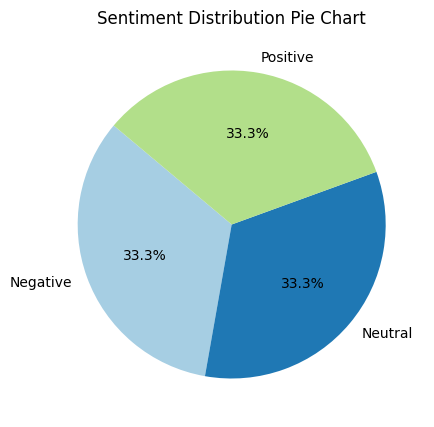

In [108]:
sentiment_counts = df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_counts))))

# Add title
plt.title('Sentiment Distribution Pie Chart')

# Show the plot
plt.show()

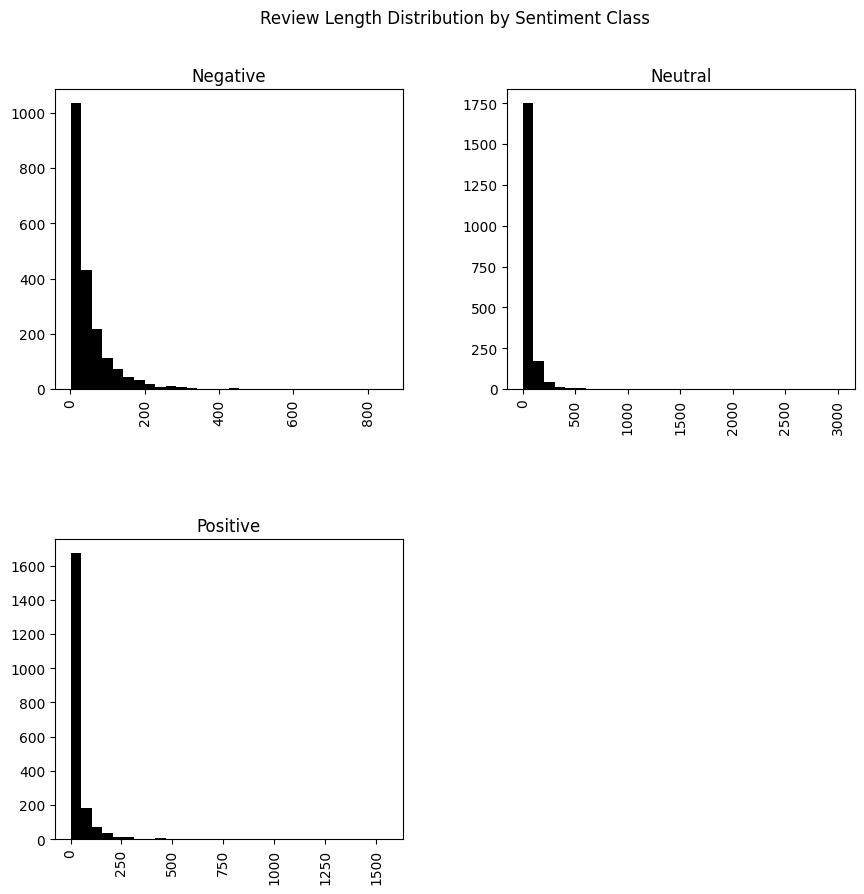

In [109]:
df['Review_length'] = df['Reviews'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
df['Review_length'].hist(by=df['sentiment'], bins=30, figsize=(10, 10), color='black')
plt.suptitle('Review Length Distribution by Sentiment Class')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

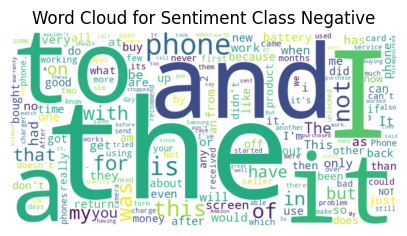

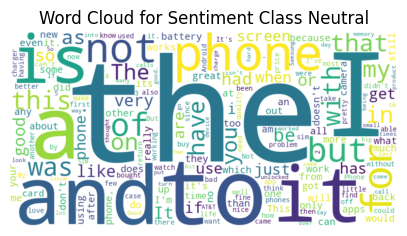

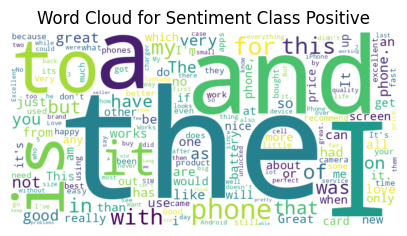

In [110]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(5, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df['sentiment'].unique():
    words = ' '.join(df[df['sentiment'] == label]['Reviews']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Sentiment Class {label}')

In [111]:
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
df

,Reviews,Rating,sentiment,Review_length
0,"Don't buy!!! It is a fake, Verified by a verif...",1,-1,13
1,not worth it.. This phone just completely shut...,1,-1,27
2,"When I received it, it didn't come with SIM ca...",1,-1,53
3,"Battery Life very low, not as user friendly as...",1,-1,27
4,It took me few days to connect internet. I ret...,1,-1,26
...,...,...,...,...
5995,Love it...,5,1,2
5996,"Good product, I like it as expected. Thank you...",5,1,11
5997,"Bought a used phone, still in OK shape, the th...",4,1,26
5998,Great product for the price. I bought it for m...,5,1,18


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Reviews']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

**knn**

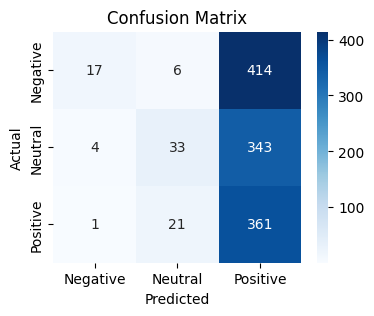

Accuracy: 0.3425
Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.04      0.07       437
           0       0.55      0.09      0.15       380
           1       0.32      0.94      0.48       383

    accuracy                           0.34      1200
   macro avg       0.55      0.36      0.24      1200
weighted avg       0.56      0.34      0.23      1200



In [113]:
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Decision Tree Classification**

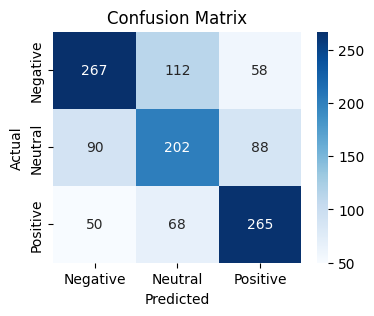

Accuracy: 0.6116666666666667
Classification Report:
               precision    recall  f1-score   support

          -1       0.66      0.61      0.63       437
           0       0.53      0.53      0.53       380
           1       0.64      0.69      0.67       383

    accuracy                           0.61      1200
   macro avg       0.61      0.61      0.61      1200
weighted avg       0.61      0.61      0.61      1200



In [114]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**SVM**

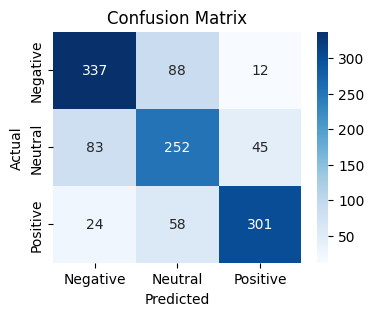

Accuracy: 0.7416666666666667
Classification Report:
               precision    recall  f1-score   support

          -1       0.76      0.77      0.77       437
           0       0.63      0.66      0.65       380
           1       0.84      0.79      0.81       383

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200



In [115]:
# Initialize SVM classifier
clf = SVC()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Logistic** **Regression**

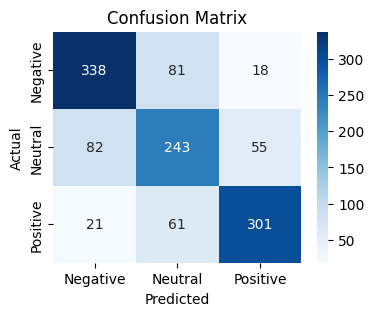

Accuracy: 0.735
Classification Report:
               precision    recall  f1-score   support

          -1       0.77      0.77      0.77       437
           0       0.63      0.64      0.64       380
           1       0.80      0.79      0.80       383

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.74      0.73      0.74      1200



In [116]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression()

# Fit the classifier on the training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Downsampling**

In [117]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume df is your DataFrame and has columns 'Sentence' and 'Sentiment'

# Features and target variable
X = df['Reviews']
y = df['sentiment']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_transformed = vectorizer.fit_transform(X)

# Separate the data into classes
neutral_mask = y == 0
positive_mask = y == 1
negative_mask = y == -1

# Perform clustering on 'Neutral' class
neutral_kmeans = KMeans(n_clusters=300, random_state=42, n_init='auto').fit(X_transformed[neutral_mask])
neutral_clusters = pd.Series(neutral_kmeans.labels_)

# Perform clustering on 'Positive' class
positive_kmeans = KMeans(n_clusters=300, random_state=42, n_init='auto').fit(X_transformed[positive_mask])
positive_clusters = pd.Series(positive_kmeans.labels_)

# Sample one instance from each cluster
neutral_indices = neutral_clusters.groupby(neutral_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)
positive_indices = positive_clusters.groupby(positive_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)

# Create a new DataFrame with the undersampled data
neutral_undersampled_df = df[neutral_mask].iloc[neutral_indices]
positive_undersampled_df = df[positive_mask].iloc[positive_indices]
negative_df = df[negative_mask]  # כל הביקורות השליליות נשמרות ללא שינוי

undersampled_df = pd.concat([neutral_undersampled_df, positive_undersampled_df, negative_df])

undersampled_df.reset_index(drop=True, inplace=True)

# Shuffle the DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [118]:
undersampled_df.to_csv('/content/drive/My Drive/undersampled_data.csv', index=False)
undersampled_df

,Reviews,Rating,sentiment,Review_length
0,I purchased this Nokia E7-00 in July of this y...,1,-1,135
1,on back of my phone it states that its shock p...,3,0,97
2,I was certain that I would rate my Treo with 5...,3,0,92
3,"This phone complete crap chiiinnaaa. phone,1st...",1,-1,42
4,Not the US version as promised,2,-1,6
...,...,...,...,...
2595,No. The display doesn't work well.,1,-1,6
2596,Works ok,2,-1,2
2597,"I just opened it and it looks good, but when I...",2,-1,82
2598,This is my second swipe phone. I do not like t...,1,-1,177


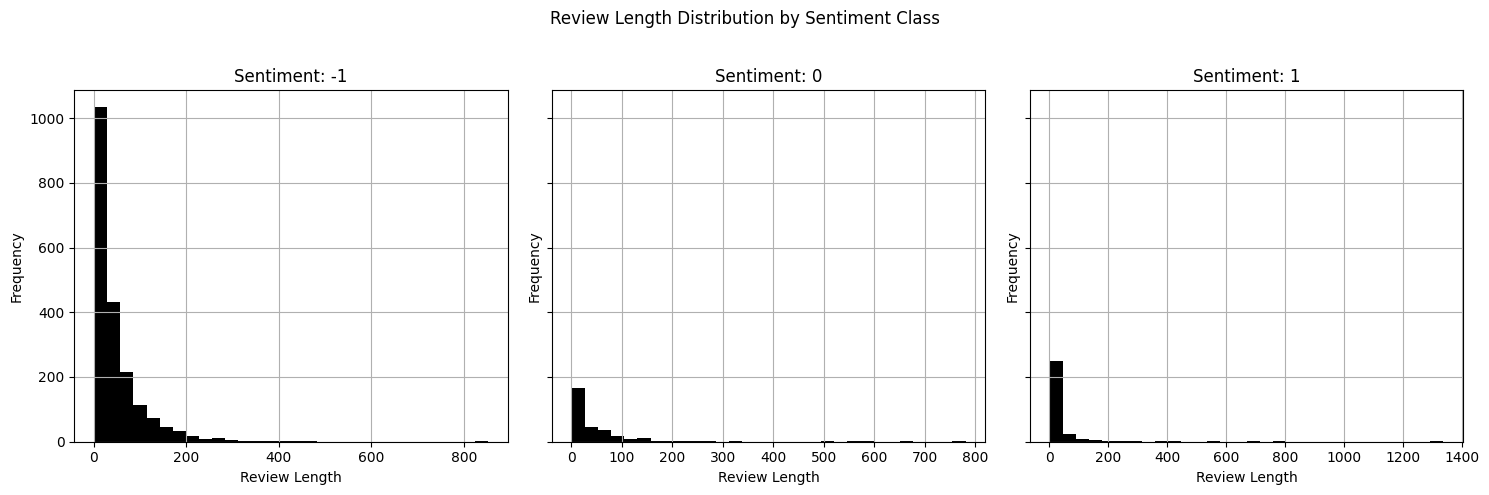

In [119]:
undersampled_df['Review_length'] = undersampled_df['Reviews'].apply(lambda x: len(x.split()))

# Get the unique sentiments
unique_sentiments = undersampled_df['sentiment'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(unique_sentiments), figsize=(15, 5), sharey=True)

# Plot each sentiment's histogram
for ax, sentiment in zip(axes, unique_sentiments):
    subset = undersampled_df[undersampled_df['sentiment'] == sentiment]
    subset['Review_length'].hist(bins=30, ax=ax, color='black')
    ax.set_title(f'Sentiment: {sentiment}')
    ax.set_xlabel('Review Length')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.suptitle('Review Length Distribution by Sentiment Class')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # התאמת הפריסה לכותרת
plt.show()

In [120]:
# Note the usage of 'undersampled_df' instead of the normal df
X = undersampled_df['Reviews']
y = undersampled_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

**knn**

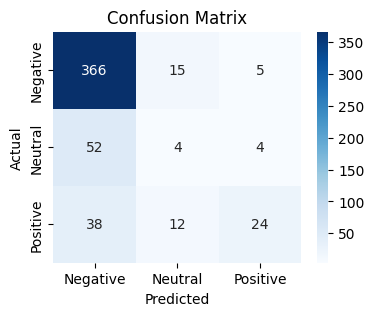

Accuracy: 0.7576923076923077
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.95      0.87       386
           0       0.13      0.07      0.09        60
           1       0.73      0.32      0.45        74

    accuracy                           0.76       520
   macro avg       0.55      0.45      0.47       520
weighted avg       0.71      0.76      0.72       520



In [121]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

y_pred = knn.predict(X_test_transformed)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Decision** **Tree** **Classification**


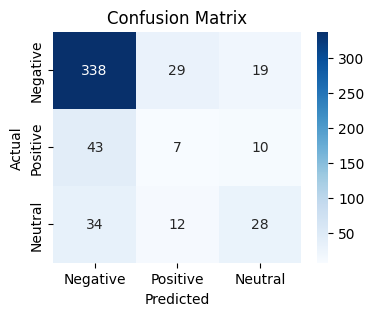

Accuracy: 0.7173076923076923
Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.88      0.84       386
           0       0.15      0.12      0.13        60
           1       0.49      0.38      0.43        74

    accuracy                           0.72       520
   macro avg       0.48      0.46      0.47       520
weighted avg       0.69      0.72      0.70       520



In [122]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**svm**

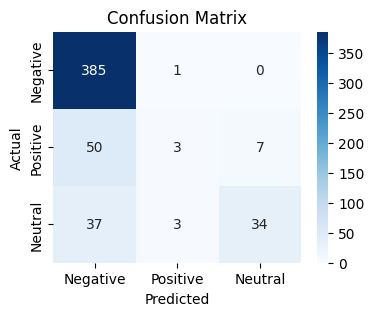

Accuracy: 0.8115384615384615
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      1.00      0.90       386
           0       0.43      0.05      0.09        60
           1       0.83      0.46      0.59        74

    accuracy                           0.81       520
   macro avg       0.69      0.50      0.53       520
weighted avg       0.77      0.81      0.76       520



In [123]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Logistic Regression**

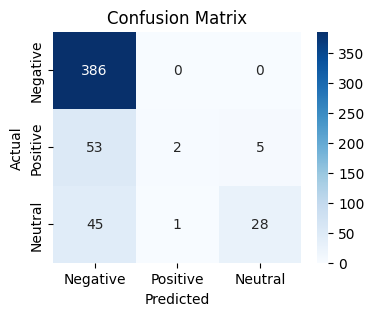

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      1.00      0.89       386
           0       0.67      0.03      0.06        60
           1       0.85      0.38      0.52        74

    accuracy                           0.80       520
   macro avg       0.77      0.47      0.49       520
weighted avg       0.79      0.80      0.74       520



In [124]:
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)

y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Preprocessing the Downsampled Data**

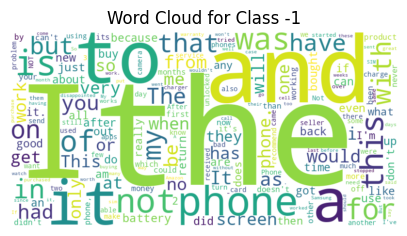

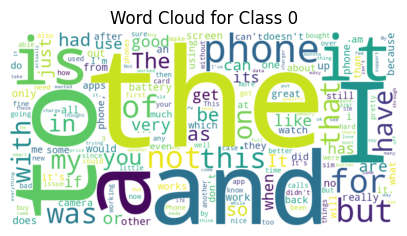

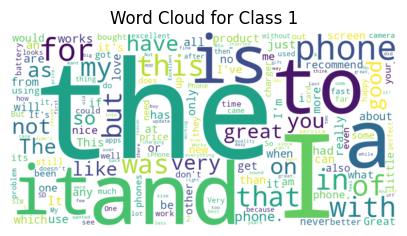

In [125]:
for label in undersampled_df['sentiment'].unique():
    words = ' '.join(undersampled_df[undersampled_df['sentiment'] == label]['Reviews']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

In [127]:
undersampled_df = pd.read_csv('/content/drive/My Drive/undersampled_data.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


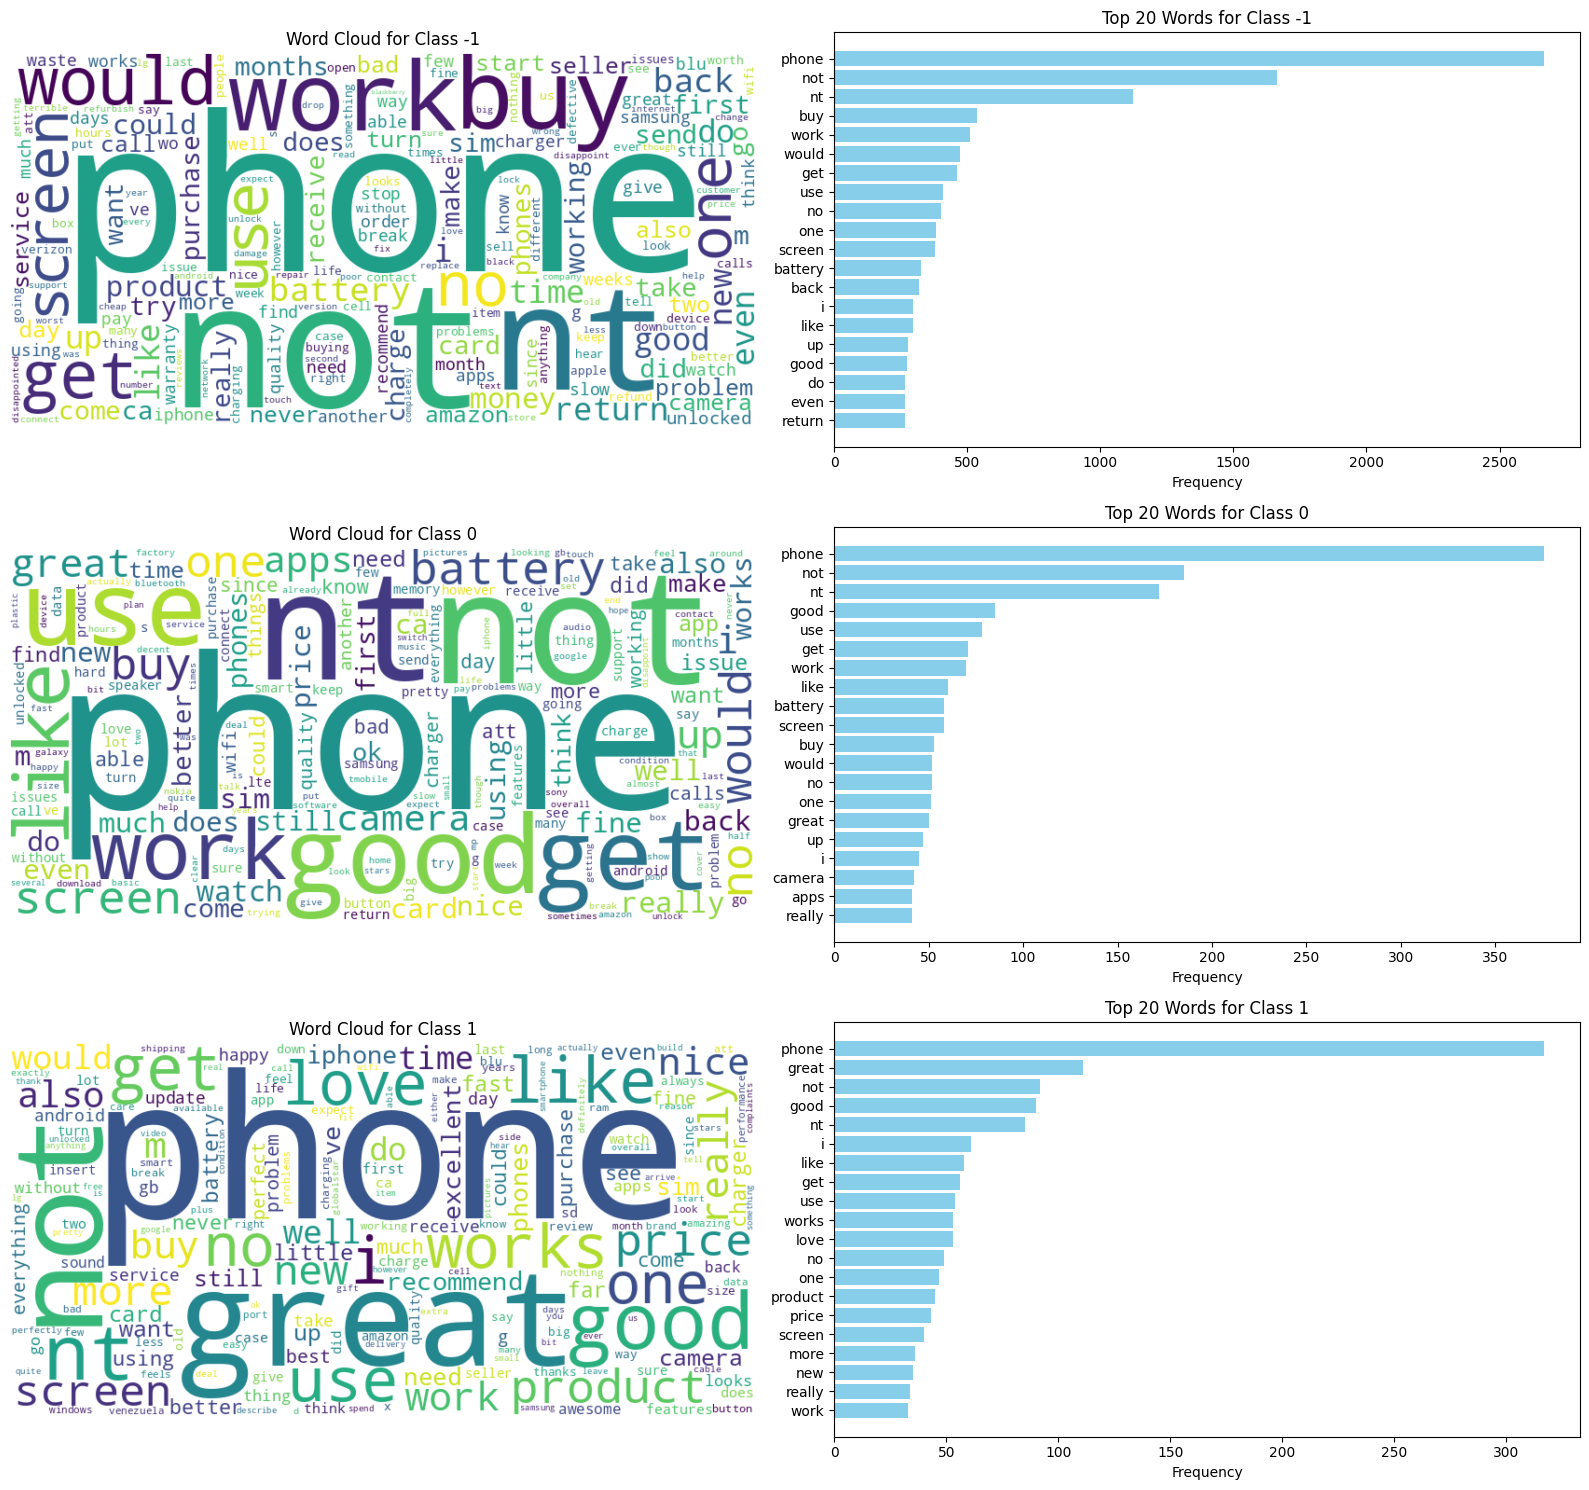

In [128]:
# Download NLTK resources
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Define stopwords and additional irrelevant words
exclude_words = {"up", "down", "few", "more", "no", "nor", "not"}
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn", '$', '%', "eur", "finnish", "finland", '(', ')'})
stop_words -= exclude_words

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_irrelevants(sentence):
    # Remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub('', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove non-alphabetic characters (optional)
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence

def preprocess_sentence(sentence):
    if isinstance(sentence, str):  # Only process strings
        sentence = remove_irrelevants(sentence)
        sentence = remove_stopwords(sentence)
        sentence = convert_past_to_present(sentence)  # Convert verbs to present tense
    return sentence

    # Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_past_to_present(sentence):
    doc = nlp(sentence)
    present_sentence = []

    for token in doc:
        if token.pos_ == 'VERB':
            # Get the lemma (base form of the verb) which often is the present tense form
            lemma = token.lemma_
            if token.tag_ in ['VBD', 'VBN']:  # Past tense and past participle tags
                present_sentence.append(lemma)
            else:
                present_sentence.append(token.text)
        else:
            present_sentence.append(token.text)

    return " ".join(present_sentence)

# Assuming df is your DataFrame and it contains 'Sentence' and 'Sentiment' columns
undersampled_df['Reviews'] = undersampled_df['Reviews'].astype(str).apply(preprocess_sentence)

# Function to plot word cloud (you need to have wordcloud and matplotlib installed)
def plot_wordcloud(word_freq, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Function to plot top 20 words bar chart
def plot_top_words(word_freq, title, ax):
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    ax.barh(words, counts, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the most frequent words on top

# Number of unique sentiments
unique_labels = undersampled_df['sentiment'].unique()
num_labels = len(unique_labels)

# Create subplots: 2 columns (word clouds and bar charts) and as many rows as unique labels
fig, axes = plt.subplots(nrows=num_labels, ncols=2, figsize=(16, 5 * num_labels))

for idx, label in enumerate(unique_labels):
    words = ' '.join(undersampled_df[undersampled_df['sentiment'] == label]['Reviews']).split()
    word_freq = Counter(words)

    # Plot word cloud
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}', axes[idx, 0])

    # Plot top 20 words bar chart
    plot_top_words(word_freq, f'Top 20 Words for Class {label}', axes[idx, 1])

plt.tight_layout()
plt.show()

In [129]:
undersampled_df.to_csv('/content/drive/My Drive/downsampled_data_preprocessed.csv', index=False)

In [130]:
undersampled_df

,Reviews,Rating,sentiment,Review_length
0,purchase nokia e july year month start problem...,1,-1,135
1,back phone states shock proof water submersibl...,3,0,97
2,certain would rate treo stars i ve many issues...,3,0,92
3,phone complete crap chiiinnaaa phonest month b...,1,-1,42
4,not us version promise,2,-1,6
...,...,...,...,...
2595,no display does nt work well,1,-1,6
2596,works ok,2,-1,2
2597,open looks good try type something letters pus...,2,-1,82
2598,second swipe phone not like settings screen no...,1,-1,177


In [131]:
X = undersampled_df['Reviews']
y = undersampled_df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

**knn**

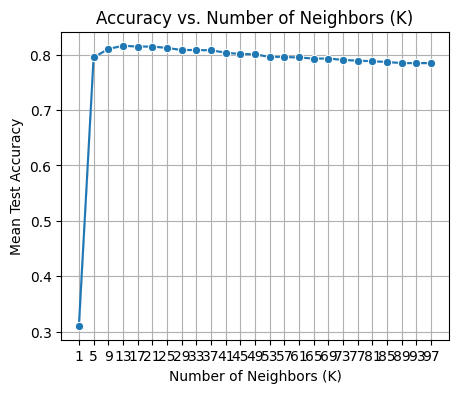

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Define the parameter grid for GridSearchCV with n_neighbors up to 100 in steps of 4
param_grid = {
    'n_neighbors': list(range(1, 101, 4)),  # Testing from 1 to 100 in steps of 4
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors']

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
# Plot accuracy vs. n_neighbors
plt.figure(figsize=(5, 4))
sns.lineplot(x=param_n_neighbors, y=mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.xticks(np.arange(min(param_n_neighbors), max(param_n_neighbors)+1, 4))  # Set x-ticks to match steps
plt.show()

Best Parameters: 43, auto
Best Cross-Validation Accuracy: 0.8014
Classification Report:
               precision    recall  f1-score   support

          -1       0.78      1.00      0.88       386
           0       0.00      0.00      0.00        60
           1       0.89      0.34      0.49        74

    accuracy                           0.79       520
   macro avg       0.56      0.45      0.46       520
weighted avg       0.71      0.79      0.72       520



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


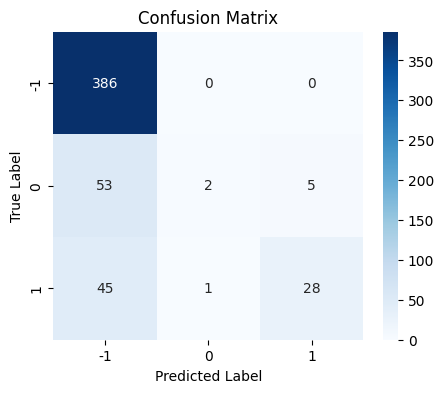

In [133]:
param_grid = {
    'n_neighbors': [43, 45, 47],  # Range of K values to test
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_k}, {best_algorithm}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree Classifier**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 75}
Cross-validation results saved to cross_validation_results.csv
Accuracy: 0.7577
Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.96      0.87       386
           0       0.00      0.00      0.00        60
           1       0.56      0.32      0.41        74

    accuracy                           0.76       520
   macro avg       0.45      0.43      0.43       520
weighted avg       0.67      0.76      0.70       520



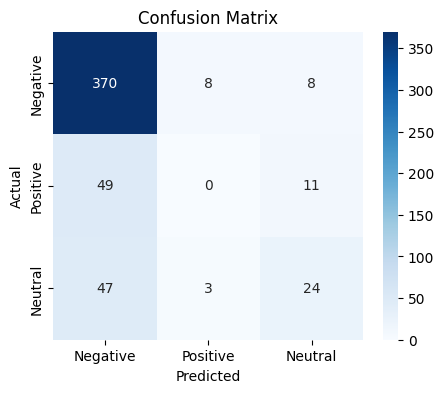

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


clf = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [60, 65, 70, 75, 80],
    'min_samples_split': [60, 65, 70, 75, 80],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the parameters of the best estimator
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_results = cross_val_score(best_clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Collect cross-validation results
cv_data = {
    'Fold': range(1, len(cv_results) + 1),
    'Accuracy': cv_results
}

# Convert to DataFrame
df_cv_results = pd.DataFrame(cv_data)

# Save to CSV
df_cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to cross_validation_results.csv")

# Make predictions on the test data
y_pred = best_clf.predict(X_test_transformed)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**svm**

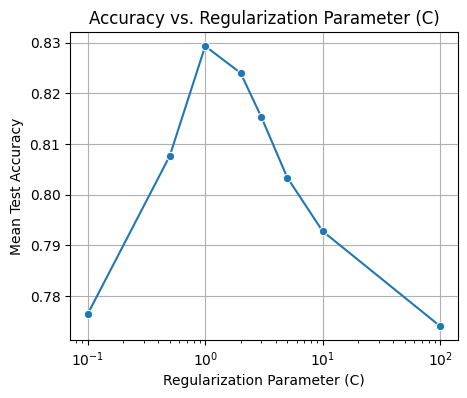

              precision    recall  f1-score   support

          -1       0.81      0.99      0.89       386
           0       0.17      0.02      0.03        60
           1       0.83      0.46      0.59        74

    accuracy                           0.81       520
   macro avg       0.60      0.49      0.51       520
weighted avg       0.74      0.81      0.75       520



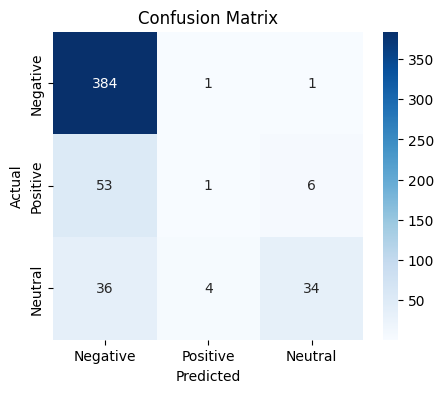

In [135]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 10, 100],  # Regularization parameter
    'kernel': ['linear']  # Kernel type to use
}

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract the results into a DataFrame
results = grid_search.cv_results_

# Plot accuracy vs. regularization parameter (C)
plt.figure(figsize=(5, 4))
sns.lineplot(x=results['param_C'], y=results['mean_test_score'], marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.grid(True)
plt.show()

# Get the best estimator and evaluate it
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression**

Best Parameters: {'max_iter': 100}
Best Cross-Validation Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      1.00      0.89       386
           0       0.17      0.02      0.03        60
           1       0.88      0.41      0.56        74

    accuracy                           0.80       520
   macro avg       0.62      0.47      0.49       520
weighted avg       0.74      0.80      0.74       520



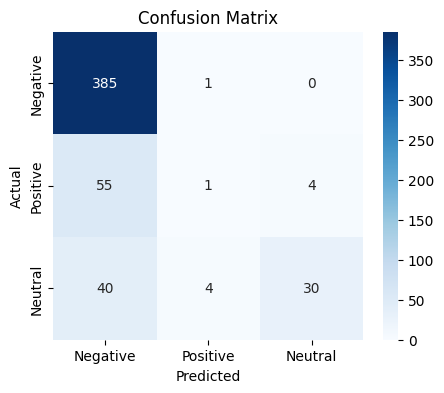

In [136]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the corresponding accuracy

best_accuracy = grid_search.best_score_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()